In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Remove zero values to clean data.

In [2]:
df = pd.read_csv('nrg_cb_gasm_linear.csv')
df['TIME_PERIOD'] = [int(x[:4]) * 12 + int(x[5:]) - 1 for x in df['TIME_PERIOD']]
df = df[df['OBS_VALUE'] != 0]
df.sort_values(['geo', 'nrg_bal', 'unit', 'TIME_PERIOD'], inplace=True)

In [3]:
tpmin, tpmax = df['TIME_PERIOD'].min(), df['TIME_PERIOD'].max()

Display data for each country, unit & energy balance.

C:\Users\Utente\AppData\Local\Temp\ipykernel_588\3870949953.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df_by_geo[(df['nrg_bal'] == nrg_bal) & (df['unit'] == unit)]


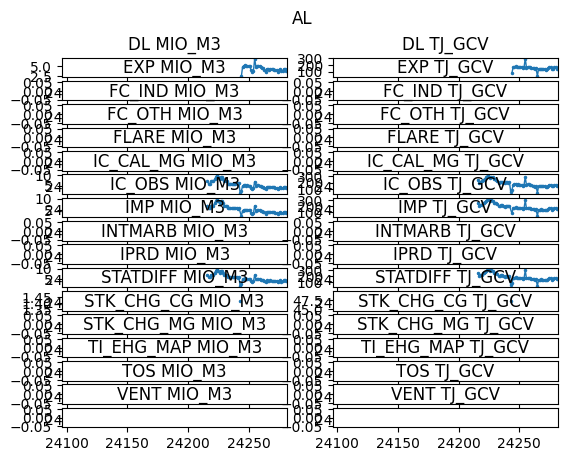

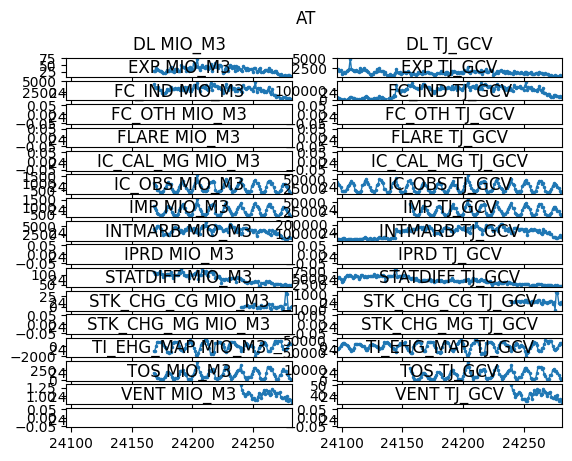

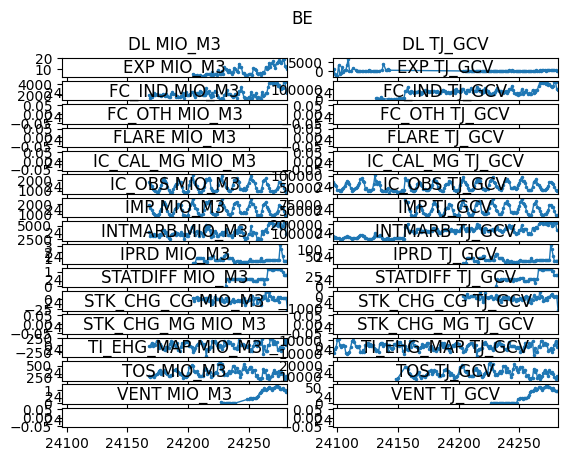

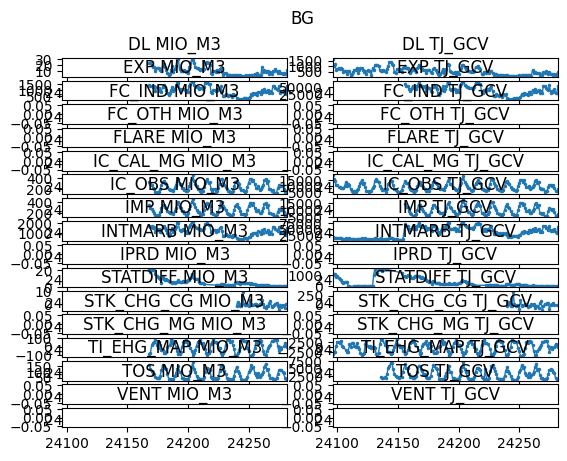

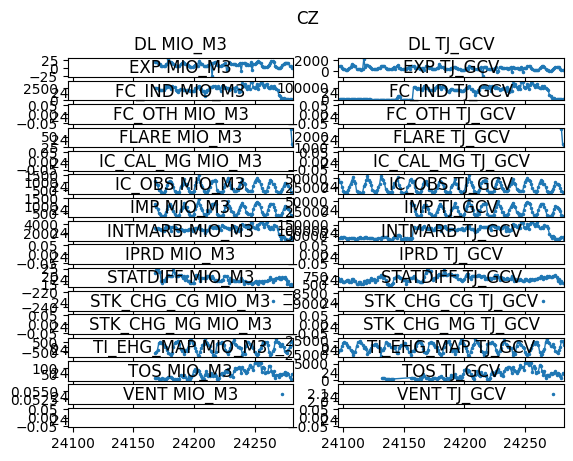

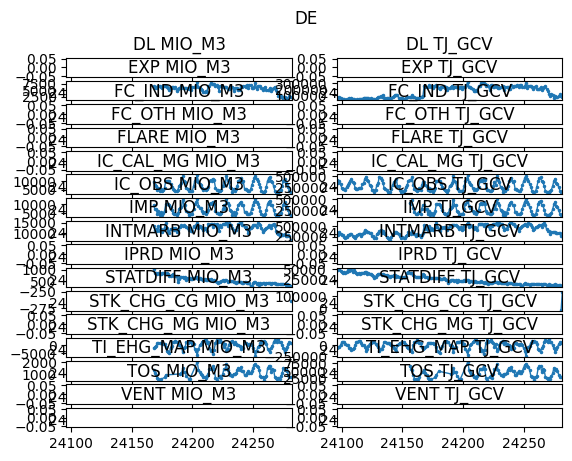

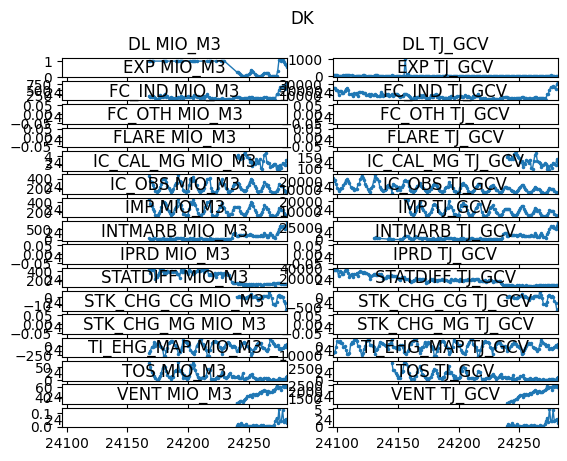

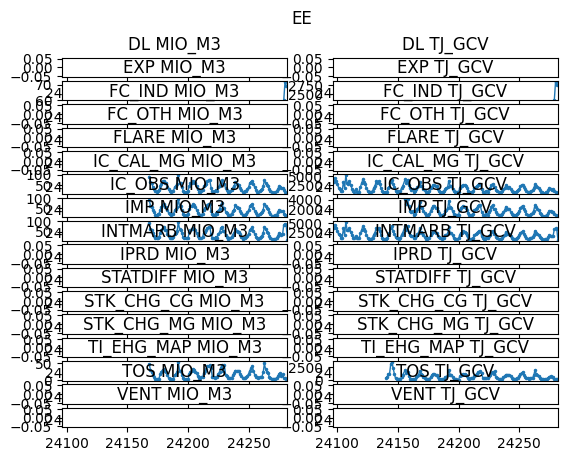

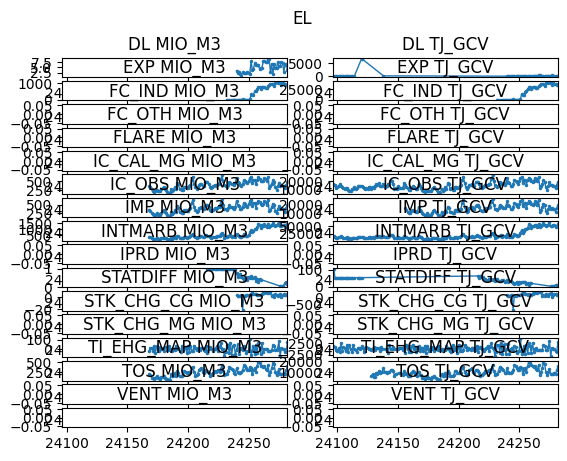

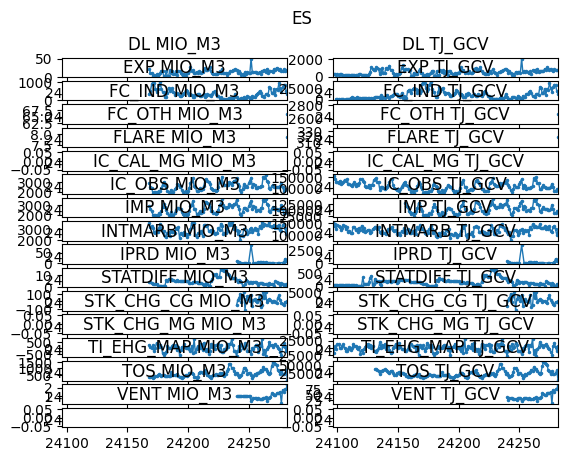

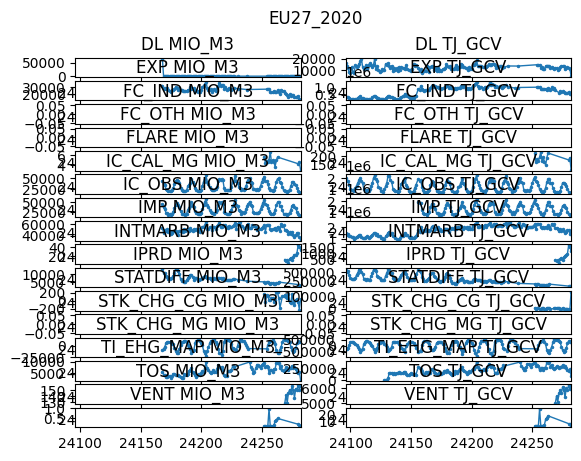

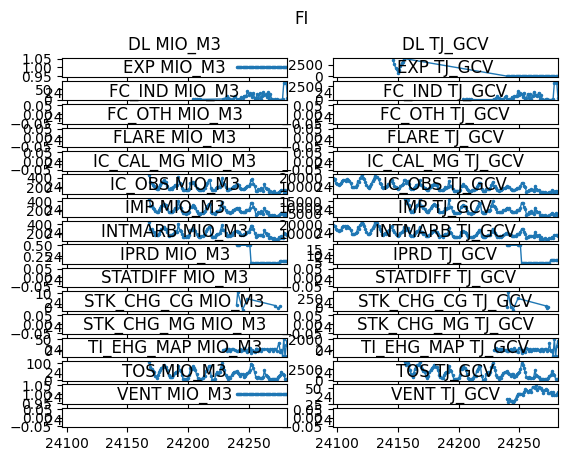

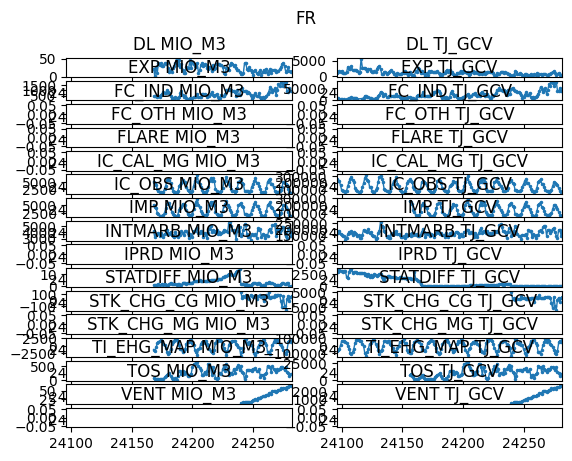

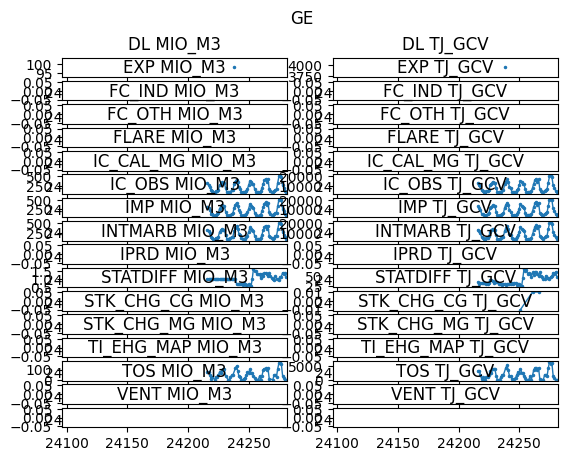

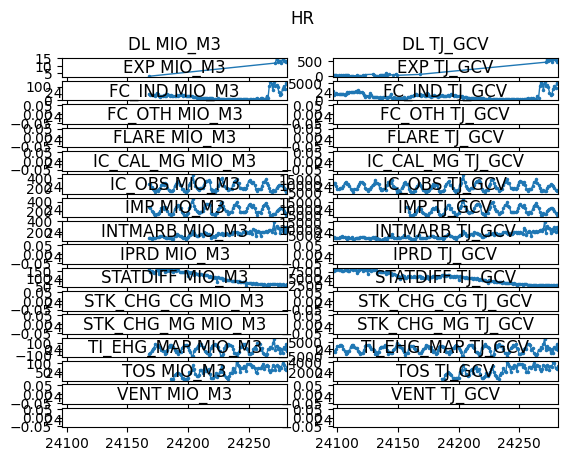

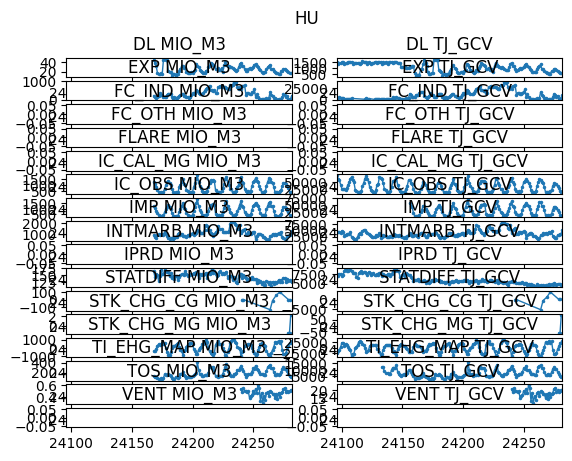

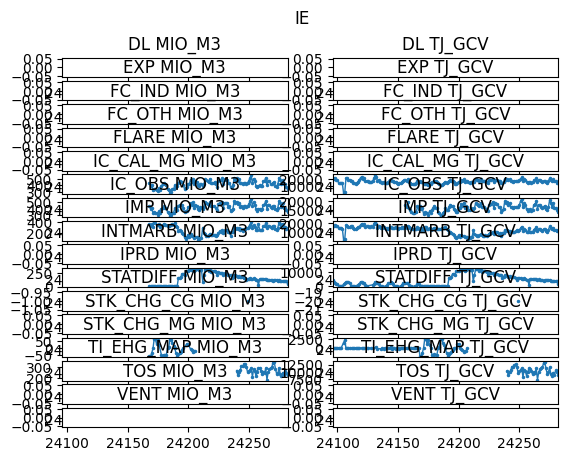

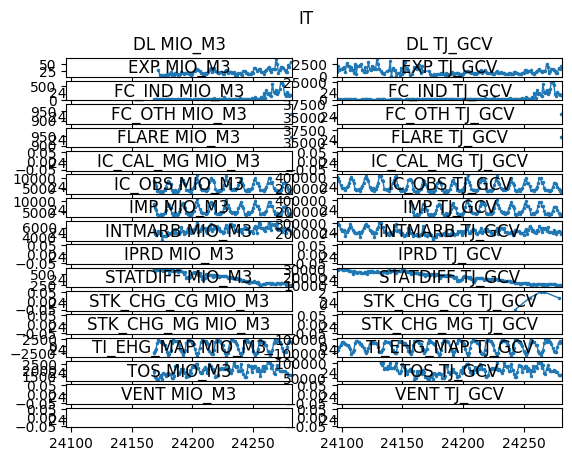

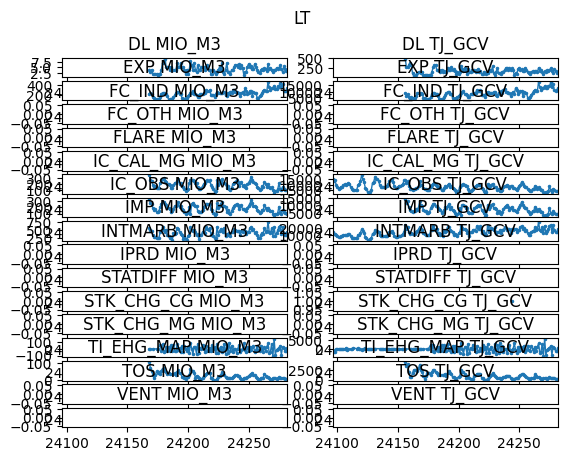

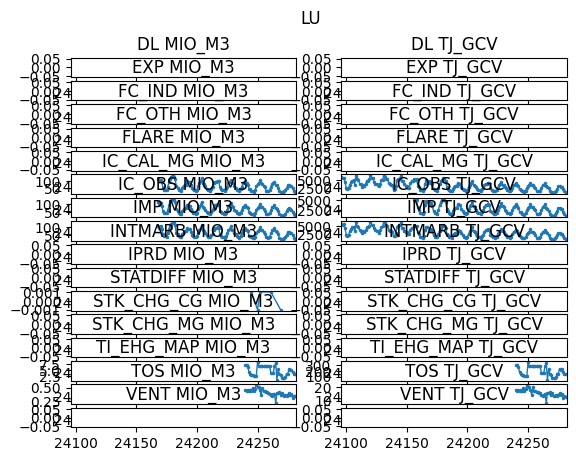

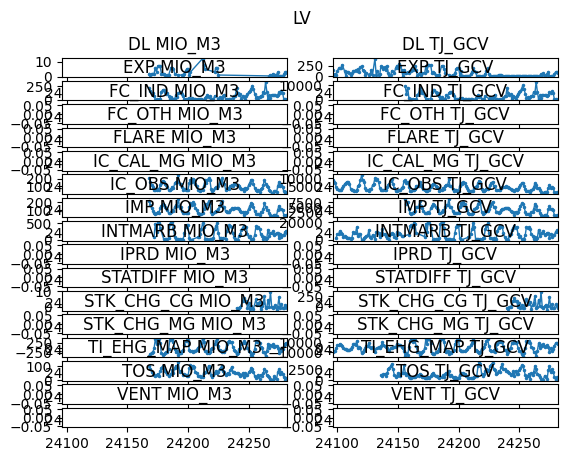

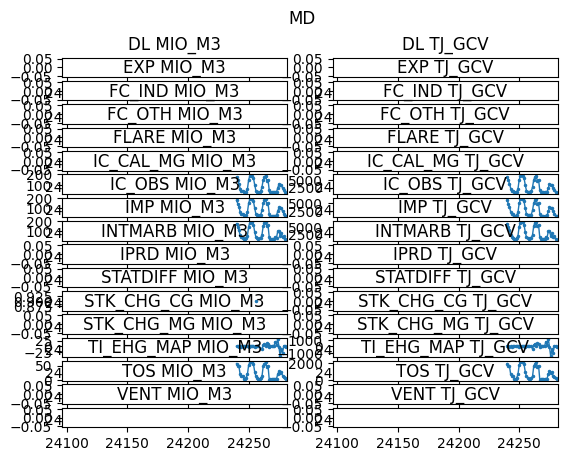

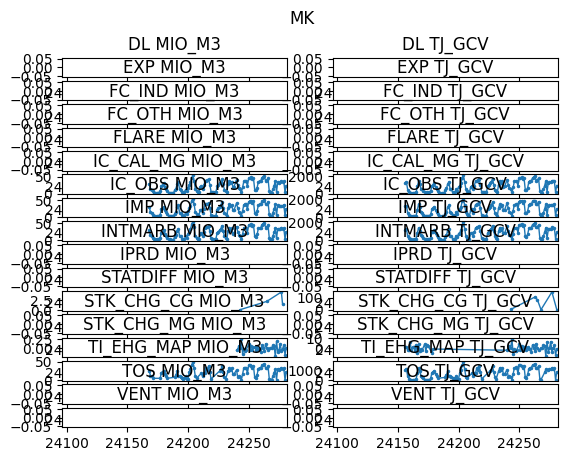

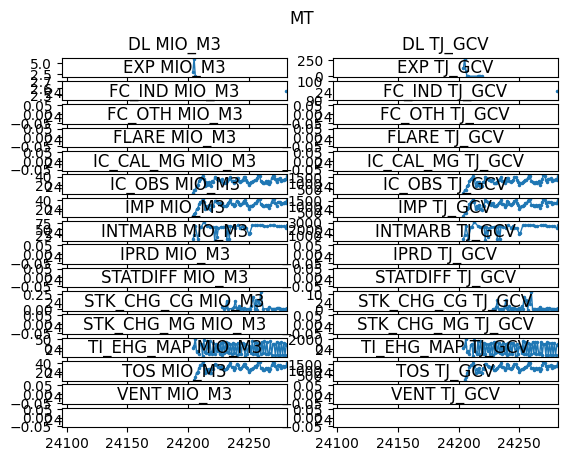

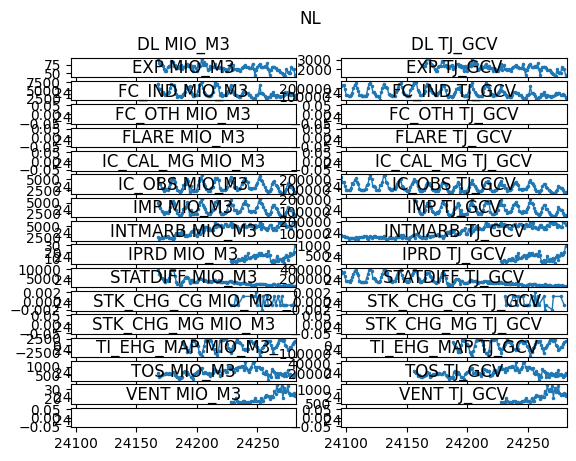

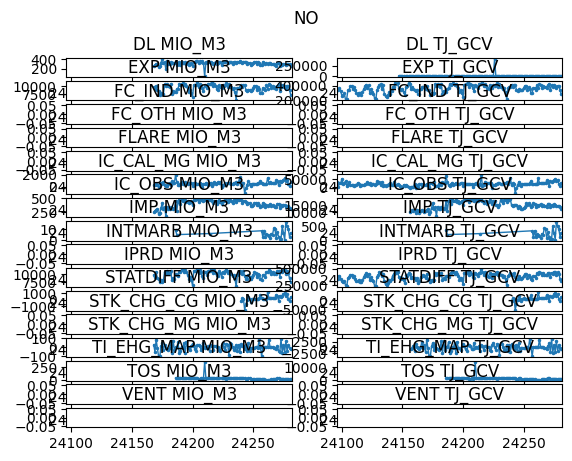

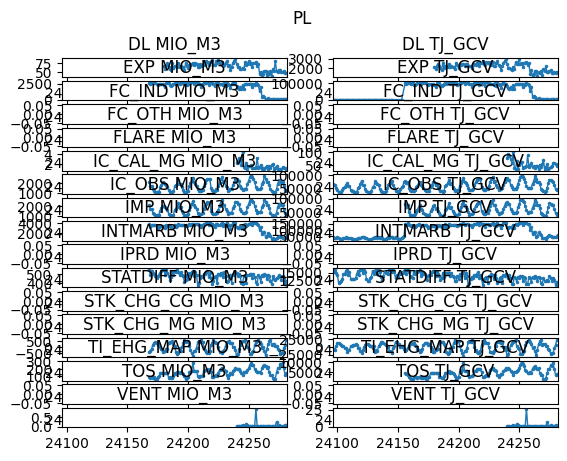

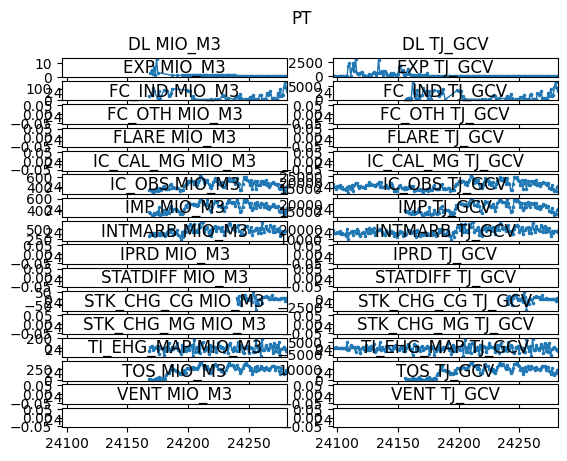

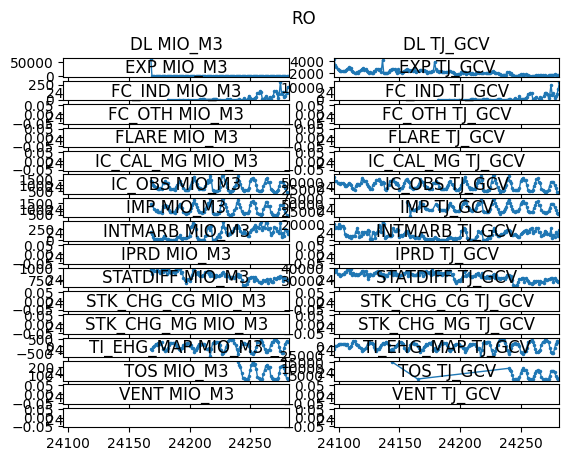

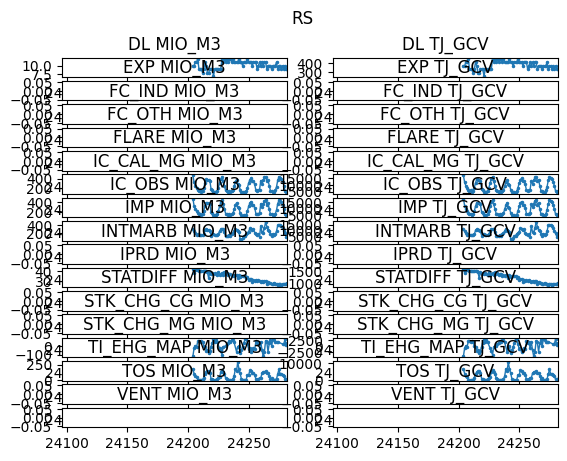

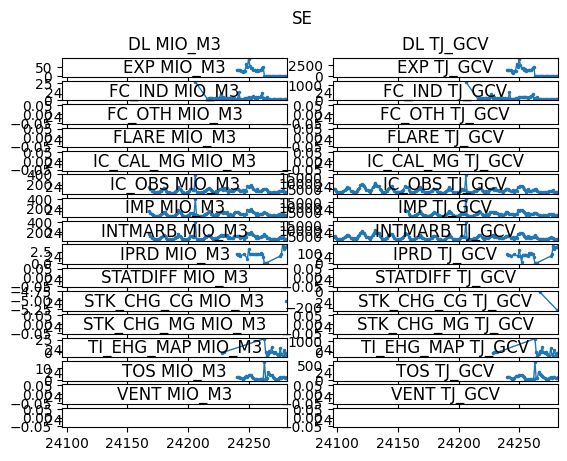

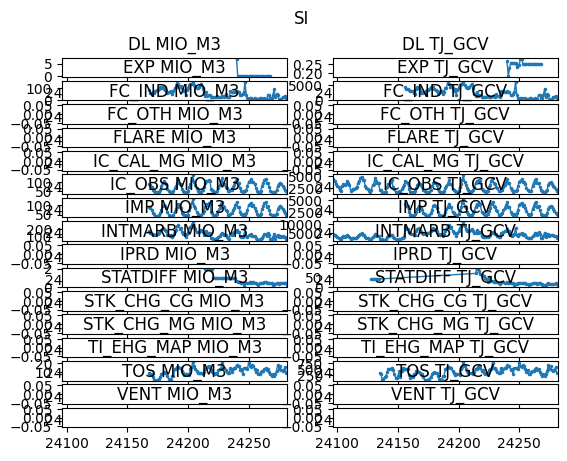

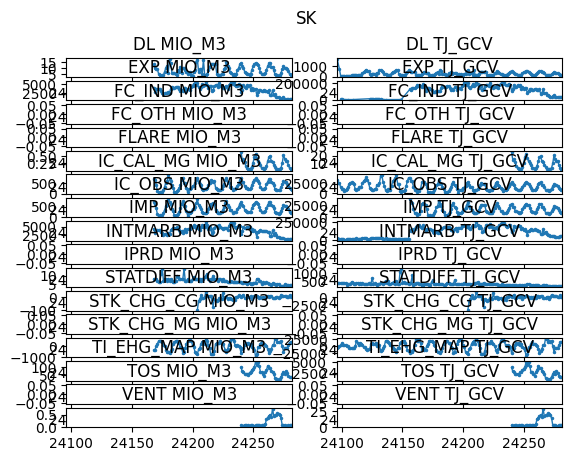

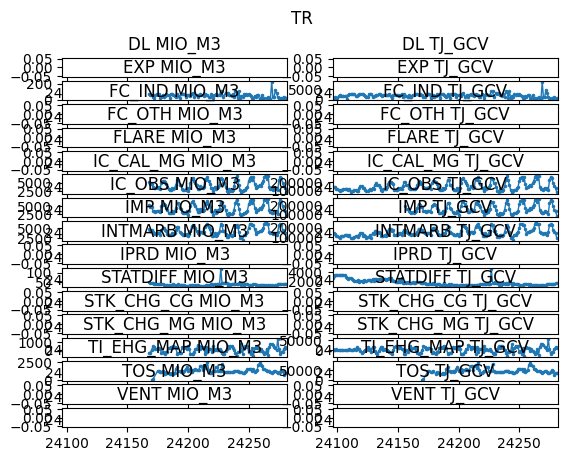

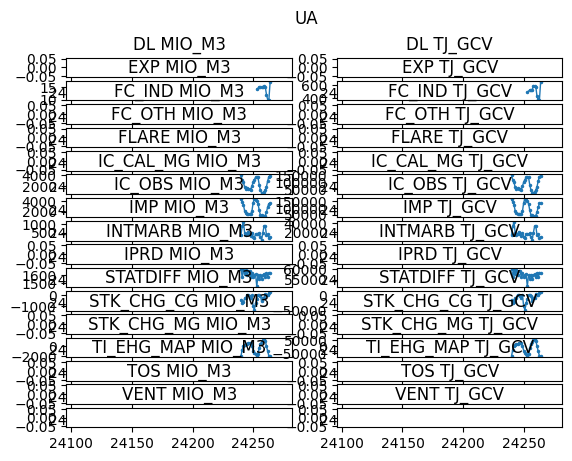

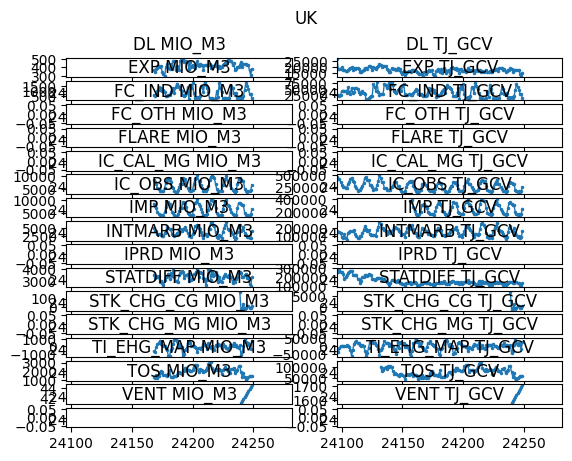

In [4]:
geos = sorted(df['geo'].unique())
nrg_bals = sorted(df['nrg_bal'].unique())
units = sorted(df['unit'].unique())
for geo in geos:
    df_by_geo = df[df['geo'] == geo]
    fig, axs = plt.subplots(len(nrg_bals), 2)
    fig.suptitle(geo)
    for j in range(len(units)):
        unit = units[j]
        for i in range(len(nrg_bals)):
            nrg_bal = nrg_bals[i]
            filtered_df = df_by_geo[(df['nrg_bal'] == nrg_bal) & (df['unit'] == unit)]
            axs[i, j].set_title(f'{nrg_bal} {unit}')
            axs[i, j].set_xlim([tpmin, tpmax])
            axs[i, j].plot(filtered_df['TIME_PERIOD'], filtered_df['OBS_VALUE'], marker='.', ms=3, linewidth=1)
    plt.show()

After removing zero values, many countries show dirty data.

Many time series are missing at all, some show missing values.

Some country show a few data or old data (a multi-step forecasting is necessary).

In [6]:
df[df['TIME_PERIOD'] >= 2023*12+(7-1)]

DATAFLOW        LAST UPDATE freq     nrg_bal   siec  \
62     ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M          DL  G3000   
3810   ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M          DL  G3000   
22165  ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M   IC_CAL_MG  G3000   
26121  ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M   IC_CAL_MG  G3000   
32389  ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M      IC_OBS  G3000   
...                       ...                ...  ...         ...    ...   
65775  ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M    STATDIFF  G3000   
69673  ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M  STK_CHG_MG  G3000   
75608  ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M  STK_CHG_MG  G3000   
88374  ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M        VENT  G3000   
89578  ESTAT:NRG_CB_GASM(1.0)  01/09/23 23:00:00    M        VENT  G3000   

         unit geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
62     MIO_M3  AL        24282      4.143      NaN  
3810   TJ_GCV  AL        24282    157.351      NaN  
22165  MIO_M3  AL        24282      4.143      NaN  
26121  TJ_GCV  AL        24282    157.351      NaN  
32389  MIO_M3  AL        24282      4.143      NaN  
...       ...  ..          ...        ...      ...  
65775  TJ_GCV  SK        24282    -27.178      NaN  
69673  MIO_M3  SK        24282    327.277      NaN  
75608  TJ_GCV  SK        24282  13215.306      NaN  
88374  MIO_M3  SK        24282      0.067      NaN  
89578  TJ_GCV  SK        24282      2.597      NaN  

[441 rows x 10 columns]

In [5]:
df[df['TIME_PERIOD'] >= 2023*12+(8-1)]

Empty DataFrame
Columns: [DATAFLOW, LAST UPDATE, freq, nrg_bal, siec, unit, geo, TIME_PERIOD, OBS_VALUE, OBS_FLAG]
Index: []

There are no data for August 2023! So a multi-step forecast is mandatory to forecast September 2023.